<a href="https://colab.research.google.com/github/strangelycutlemon/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd
persons_data_url = "https://raw.githubusercontent.com/strangelycutlemon/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv"
persons_data = pd.read_csv(persons_data_url)


In [2]:
print(pd.__version__)

0.23.4


In [3]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.199
botocore==1.12.199
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.13
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.3
dlib==19.16.0
dm-sonnet==1.34
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy

In [18]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 4.5MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [4]:
persons_data.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [5]:
persons_data.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [0]:
age_bins = pd.cut(persons_data['age'], 8)
weight_bins = pd.cut(persons_data['weight'], 8)
et_bins = pd.cut(persons_data['exercise_time'], 4)
# Using quartiles for exercise time for simplicity's sake.

In [18]:
crosstab = pd.crosstab(et_bins, weight_bins, normalize='columns')
print(type(crosstab))
crosstab


<class 'pandas.core.frame.DataFrame'>


weight,"(99.854, 118.25]","(118.25, 136.5]","(136.5, 154.75]","(154.75, 173.0]","(173.0, 191.25]","(191.25, 209.5]","(209.5, 227.75]","(227.75, 246.0]"
exercise_time,,,,,,,,
"(-0.3, 75.0]",0.198198,0.163793,0.206573,0.244565,0.375887,0.482143,0.720588,1.0
"(75.0, 150.0]",0.220721,0.219828,0.234742,0.358696,0.397163,0.473214,0.279412,0.0
"(150.0, 225.0]",0.270270,0.258621,0.291080,0.228261,0.226950,0.044643,0.000000,0.0
"(225.0, 300.0]",0.310811,0.357759,0.267606,0.168478,0.000000,0.000000,0.000000,0.0


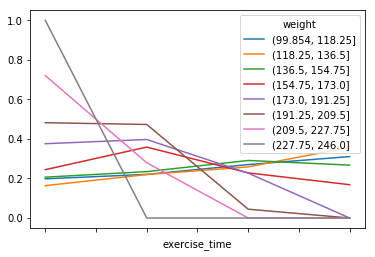

In [21]:
crosstab.plot()
# According to this plot, exercise time doesn't seem to matter much for the 3 lowest weight classes.
# Arguably not much for the 4th lowest either.
# The highest weight class doesn't contain anyone who exercises more than an hour per week.
# At this point I think I need more bins for exercise time and fewer for weight.
# Many of the weight classes look similar! 5 weight classes should be fine.

In [0]:
# Rebinning
age_bins = pd.cut(persons_data['age'], 8)
weight_bins = pd.cut(persons_data['weight'], 5)
et_bins = pd.cut(persons_data['exercise_time'], 20)

<class 'pandas.core.frame.DataFrame'>


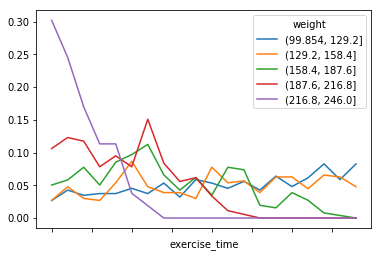

In [25]:
crosstab = pd.crosstab(et_bins, weight_bins, normalize='columns')
print(type(crosstab))
crosstab.plot()
# Much more interesting!

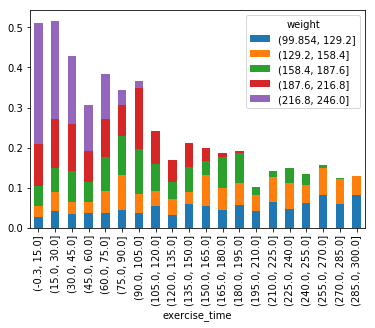

In [27]:
crosstab.plot(kind='bar', stacked=True)

In [32]:
persons_data.corr(method='spearman')

,Unnamed: 0,age,weight,exercise_time
Unnamed: 0,1.000000,-0.000285,-0.061695,-0.019131
age,-0.000285,1.000000,0.135898,-0.269918
weight,-0.061695,0.135898,1.000000,-0.450107
exercise_time,-0.019131,-0.269918,-0.450107,1.000000


In [33]:
persons_data.corr(method='pearson')

,Unnamed: 0,age,weight,exercise_time
Unnamed: 0,1.000000,-0.000418,-0.060297,-0.020138
age,-0.000418,1.000000,0.144168,-0.273818
weight,-0.060297,0.144168,1.000000,-0.478021
exercise_time,-0.020138,-0.273818,-0.478021,1.000000


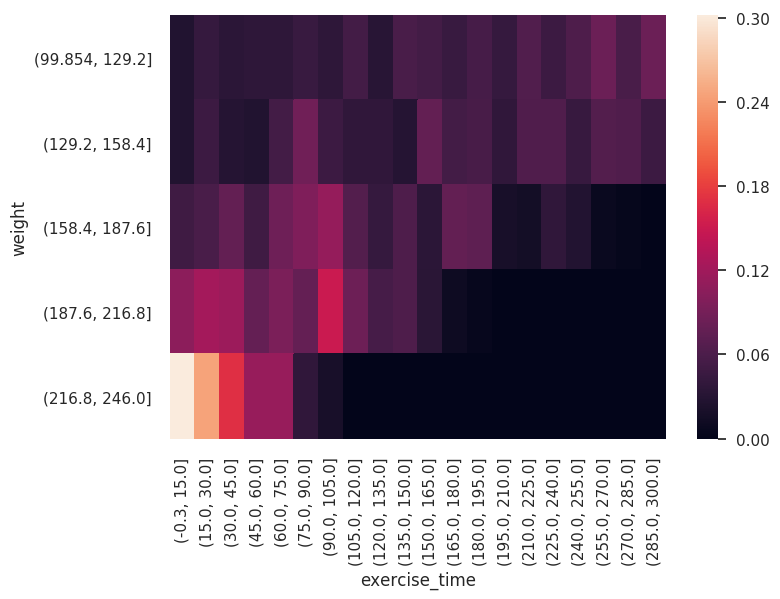

In [40]:
# Both of the above correlation tables show a slight positive correlation between
# age and weight, and a significant negative correlation between weight and exercise time.
# This confirms that age is the confounding factor here.

#let's try a heatmap.

import seaborn as sns; sns.set()

ax = sns.heatmap(crosstab.T)

# This is just a different view of the crosstab. Seems that exercising just an hour is significant!

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)